# E-Commerce Analytics

## Data Understanding

<p>
  <figure align="center">
      <img src="https://i.imgur.com/HRhd2Y0.png" width="700px">
      <figcaption align='center'> <a href="https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data?select=olist_geolocation_dataset.csv">Sumber Dataset<figcaption/>
  <figure/>


## Business Question

- Bagaimana tren penjualan dari tahun ke tahun?
- Bagaimana keuntungan penjualan pada lima kategori produk dengan penjualan tertinggi dan terendah?
- Apa metode pembayaran yang paling sering digunakan oleh pelanggan, dan bagaimana distribusinya?
- Bagaimana perbandingan ulasan produk antar kategori, dan kategori mana yang paling sering mendapatkan ulasan positif?
- Identifikasi State mana yang memiliki jumlah pelanggan terbanyak

## Daftar Pustaka Yang Di Butuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
import zipfile
import os
import folium
from folium import plugins

## Load Dataset

In [2]:
data_url = 'https://github.com/wildanmjjhd29/E-Commerce-Analytics/releases/download/v1.0/E-Commerce-Dataset.zip'
urllib.request.urlretrieve(data_url, 'E-Commerce-Dataset.zip')
local_file = 'E-Commerce-Dataset.zip'
zip_ref = zipfile.ZipFile(local_file,'r')
zip_ref.extractall('dataset/')
zip_ref.close()

In [3]:
orders_df = pd.read_csv("/content/dataset/olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
orders_payment_df = pd.read_csv("/content/dataset/olist_order_payments_dataset.csv")
orders_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
orders_items_df = pd.read_csv("/content/dataset/olist_order_items_dataset.csv")
orders_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
customer_df = pd.read_csv("/content/dataset/olist_customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
orders_review_df = pd.read_csv("/content/dataset/olist_order_reviews_dataset.csv")
orders_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
products_df = pd.read_csv("/content/dataset/olist_products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
sellers_df = pd.read_csv("/content/dataset/olist_sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
geolocation_df = pd.read_csv("/content/dataset/olist_geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
category_translate_df = pd.read_csv('/content/dataset/product_category_name_translation.csv')
category_translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Assesing Data

### Menilai tabel `orders_df`

In [12]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
# Mengecek Missing Values
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
# Mengecek Duplikasi data
orders_df.duplicated().sum()

0

In [15]:
orders_df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

### Menilai Tabel `orders_items_df`

In [16]:
orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
orders_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [18]:
orders_items_df.duplicated().sum()

0

### Menilai Tabel `orders_payment_df`

In [19]:
orders_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [20]:
orders_payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [21]:
orders_payment_df.duplicated().sum()

0

In [22]:
orders_payment_df.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

### Menillai tabel `products_df`



In [23]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [24]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [25]:
products_df.duplicated().sum()

0

### Menilai tabel `customer_df`

In [26]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [27]:
# Mengecek Missing values
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [28]:
customer_df.duplicated().sum()

0

###  Menilai tabel `geolocation_df`

In [29]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


<hr/>

## Data Cleaning

### Cleaning tabel `orders_df`

In [30]:
# Menghapus kolom yang missing
orders_df = orders_df.drop(['order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date'],axis=1)

In [31]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
dtype: int64

In [32]:
# Menangani tipe data yang salah
orders_df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_estimated_delivery_date    object
dtype: object

In [33]:
orders_df[['order_purchase_timestamp','order_estimated_delivery_date']] = orders_df[['order_purchase_timestamp','order_estimated_delivery_date']].astype('datetime64[ns]')

In [34]:
orders_df[['order_purchase_timestamp','order_estimated_delivery_date']].dtypes

order_purchase_timestamp         datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

### Cleaning tabel `orders_items_df`

In [35]:
orders_items_df.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [36]:
orders_items_df['shipping_limit_date'] = orders_items_df['shipping_limit_date'].astype('datetime64[ns]')

In [37]:
orders_items_df.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

### Cleaning tabel `Products_df`

In [38]:
# Menghapus kolom yang kira kira tidak di butuhkan
products_df = products_df[['product_id','product_category_name']]

In [39]:
# Menangani Missing Values
products_df = products_df.dropna()

In [40]:
# Translate Nama kategori kedalam bahasa inggris
products_df = pd.merge(products_df,category_translate_df,how='inner',on=['product_category_name'])

In [41]:
products_df = products_df.drop(['product_category_name'],axis=1)

In [42]:
products_df = products_df.rename(columns={'product_category_name_english':'category_name'})

In [43]:
products_df.sample()

,product_id,category_name
189,c1ec41f62db54e0bfbca55a7068f0b5e,perfumery


## EDA

### Membuat tabel `orders_info`


In [44]:
orders_info = pd.merge(orders_df,orders_items_df, how='inner', on = ['order_id'])

In [45]:
orders_info = pd.merge(orders_info,orders_payment_df,how='inner',on=['order_id'])

In [46]:
orders_info.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1,credit_card,3,179.12


In [47]:
# Membuat kolom total harga
orders_info['total_harga']= orders_info['price'] + orders_info['freight_value']

In [48]:
# Membuat kolom laba
orders_info['laba'] = orders_info['payment_value'] - orders_info['total_harga']

In [49]:
# Membuat Kolom Total Pendapatan
orders_info['total_pendapatan'] = orders_info['laba'] + orders_info['total_harga']

In [50]:
# Mencari trend penjualan
transaksi_berhasil = orders_info[orders_info['order_status'].isin(['delivered', 'shipped'])].copy()

# Menghitung jumlah transaksi yang berhasil
transaksi_berhasil.shape[0]

116279

In [51]:
# Membuat kolom untuk menyimpan informasi bulan dan tahun
transaksi_berhasil['bulan_tahun'] = transaksi_berhasil['order_purchase_timestamp'].dt.to_period('M')

In [52]:
# Mencari trend penjualan
trend_penjualan = transaksi_berhasil.groupby('bulan_tahun')['total_harga'].sum()
trend_penjualan

bulan_tahun
2016-09        136.23
2016-10      49400.87
2016-12         19.62
2017-01     139713.87
2017-02     290066.35
2017-03     444673.53
2017-04     433473.03
2017-05     619688.86
2017-06     519426.15
2017-07     615944.98
2017-08     681794.02
2017-09     750976.10
2017-10     791758.96
2017-11    1203495.95
2017-12     882025.92
2018-01    1132950.77
2018-02    1017165.34
2018-03    1190424.49
2018-04    1191619.59
2018-05    1179792.93
2018-06    1072034.11
2018-07    1072547.16
2018-08    1028843.72
2018-09        166.46
Freq: M, Name: total_harga, dtype: float64

In [53]:
# Trend total laba
trend_laba = transaksi_berhasil.groupby('bulan_tahun')['laba'].sum()
trend_laba

bulan_tahun
2016-09       136.23
2016-10     13916.39
2016-12         0.00
2017-01     40847.91
2017-02     40366.66
2017-03     66082.27
2017-04     30784.09
2017-05     91333.05
2017-06     72230.44
2017-07    109929.83
2017-08    167522.24
2017-09    252754.90
2017-10    213964.31
2017-11    354624.13
2017-12    145980.53
2018-01    254888.09
2018-02    278960.44
2018-03    267858.02
2018-04    296588.26
2018-05    310034.36
2018-06    222283.87
2018-07    243033.33
2018-08    190974.49
2018-09         0.00
Freq: M, Name: laba, dtype: float64

In [54]:
# Mencari trend total pendapatan
trend_total_pendapatan = transaksi_berhasil.groupby('bulan_tahun')['total_pendapatan'].sum()
trend_total_pendapatan

bulan_tahun
2016-09        272.46
2016-10      63317.26
2016-12         19.62
2017-01     180561.78
2017-02     330433.01
2017-03     510755.80
2017-04     464257.12
2017-05     711021.91
2017-06     591656.59
2017-07     725874.81
2017-08     849316.26
2017-09    1003731.00
2017-10    1005723.27
2017-11    1558120.08
2017-12    1028006.45
2018-01    1387838.86
2018-02    1296125.78
2018-03    1458282.51
2018-04    1488207.85
2018-05    1489827.29
2018-06    1294317.98
2018-07    1315580.49
2018-08    1219818.21
2018-09        166.46
Freq: M, Name: total_pendapatan, dtype: float64

### Merge `products_df` pada `orders_info`

In [55]:
orders_info = pd.merge(orders_info,products_df,how='inner',on='product_id')

In [56]:
# Mencari trend penjualan
transaksi_berhasil = orders_info[orders_info['order_status'].isin(['delivered', 'shipped'])].copy()

In [57]:
laba_category = transaksi_berhasil.groupby('category_name')['laba'].sum()
laba_category = laba_category.sort_values(ascending=False)
laba_category

category_name
computers_accessories                    481833.16
furniture_decor                          473701.66
bed_bath_table                           401967.30
office_furniture                         287043.78
housewares                               270841.17
                                           ...    
furniture_mattress_and_upholstery          -549.99
small_appliances_home_oven_and_coffee      -601.05
musical_instruments                       -1443.65
home_appliances                           -1879.18
home_appliances_2                        -11079.12
Name: laba, Length: 71, dtype: float64

In [58]:
# 5 kategori dengan hasil keuntungan paling banyak
laba_teratas = laba_category.head()
laba_teratas = pd.DataFrame(laba_teratas)
laba_teratas

,laba
category_name,
computers_accessories,481833.16
furniture_decor,473701.66
bed_bath_table,401967.30
office_furniture,287043.78
housewares,270841.17


In [59]:
# 5 Kategori Yang mengalami Kerugian
rugi_teratas = laba_category.tail()
rugi_teratas = pd.DataFrame(rugi_teratas)
rugi_teratas = rugi_teratas.sort_values(by='laba',ascending=True)
rugi_teratas

,laba
category_name,
home_appliances_2,-11079.12
home_appliances,-1879.18
musical_instruments,-1443.65
small_appliances_home_oven_and_coffee,-601.05
furniture_mattress_and_upholstery,-549.99


In [60]:
# Mengidentifikasi Perbandingan pengiriman produk
status = orders_info['order_status'].value_counts()
status

delivered      113384
shipped          1214
canceled          549
processing        362
invoiced          359
unavailable         7
approved            3
Name: order_status, dtype: int64

In [61]:
# Mengidentifikasi Perbandingan pembayaran
payment = orders_info['payment_type'].value_counts()
payment

credit_card    85523
boleto         22542
voucher         6155
debit_card      1658
Name: payment_type, dtype: int64

### Merge tabel `orders_reviews_df` ke `orders_info`

In [62]:
orders_review_df = orders_review_df[['review_id','order_id','review_score']]
orders_info = pd.merge(orders_info,orders_review_df, how='inner',on=['order_id'])

In [63]:
rating = orders_info['review_score'].value_counts()
rating = rating[[5,4,3,2,1]]
rating

5    65374
4    21951
3     9718
2     4020
1    14546
Name: review_score, dtype: int64

In [64]:
rating_kategori = orders_info.groupby('category_name')['review_score'].value_counts()
rating_kategori = rating_kategori.unstack(level='review_score')
rating_kategori.head()

review_score,1,2,3,4,5
category_name,,,,,
agro_industry_and_commerce,27.0,7.0,14.0,57.0,147.0
air_conditioning,44.0,8.0,26.0,54.0,165.0
art,33.0,7.0,19.0,40.0,118.0
arts_and_craftmanship,3.0,NaN,3.0,3.0,15.0
audio,62.0,19.0,37.0,58.0,201.0


In [65]:
# Mencari kategori produk yang paling banyak mendapat ulasan baik
rating_lima = rating_kategori.sort_values(by=5, ascending=False).head()
rating_lima

review_score,1,2,3,4,5
category_name,,,,,
bed_bath_table,1724.0,562.0,1166.0,2229.0,6166.0
health_beauty,1128.0,245.0,778.0,1769.0,6024.0
sports_leisure,1061.0,238.0,664.0,1695.0,5284.0
furniture_decor,1303.0,390.0,777.0,1575.0,4698.0
computers_accessories,1199.0,290.0,688.0,1581.0,4347.0


In [66]:
rating_lima  = rating_lima[5]

### Merge tabel `customer_df` & `geolocation_df` untuk tabel `customer_info`

In [67]:
customer_df = customer_df.rename(columns={'customer_zip_code_prefix':'zip_code_prefix'})
geolocation_df = geolocation_df.rename(columns={'geolocation_zip_code_prefix' :'zip_code_prefix'})
customer_info = pd.merge(customer_df, geolocation_df, how='inner', on=['zip_code_prefix'])
customer_info.to_csv('customer_info.csv')
customer_info.head()

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194,franca,SP


In [68]:
# Mencari Kota dengan customer terbanyak
top_city = customer_info['customer_city'].value_counts().head()
top_city

rio de janeiro    1913966
sao paulo         1372374
belo horizonte     737548
niteroi            452857
curitiba           255744
Name: customer_city, dtype: int64

In [69]:
# Menghitung jumlah pelanggan untuk setiap negara bagian
state_counts = customer_info['customer_state'].value_counts()

In [70]:
# Membuat pemetaan dari singkatan ke nama lengkap negara bagian
state_mapping = {
    'SP': 'Sao Paulo',
    'RJ': 'Rio de Janeiro',
    'MG': 'Minas Gerais',
    'RS': 'Rio Grande do Sul',
    'PR': 'Parana',
    'SC': 'Santa Catarina',
    'BA': 'Bahia',
    'ES': 'Espirito Santo',
    'GO': 'Goias',
    'MT': 'Mato Grosso',
    'PE': 'Pernambuco',
    'DF': 'Distrito Federal',
    'PA': 'Para',
    'CE': 'Ceara',
    'MS': 'Mato Grosso do Sul',
    'MA': 'Maranhao',
    'AL': 'Alagoas',
    'PB': 'Paraiba',
    'SE': 'Sergipe',
    'PI': 'Piaui',
    'RO': 'Rondonia',
    'RN': 'Rio Grande do Norte',
    'TO': 'Tocantins',
    'AC': 'Acre',
    'AM': 'Amazonas',
    'AP': 'Amapa',
    'RR': 'Roraima'
}

In [71]:
top_state = state_counts.rename(index=state_mapping).head()
top_state

Sao Paulo            5620450
Rio de Janeiro       3015709
Minas Gerais         2878728
Rio Grande do Sul     805359
Parana                626035
Name: customer_state, dtype: int64

## Data Visualization

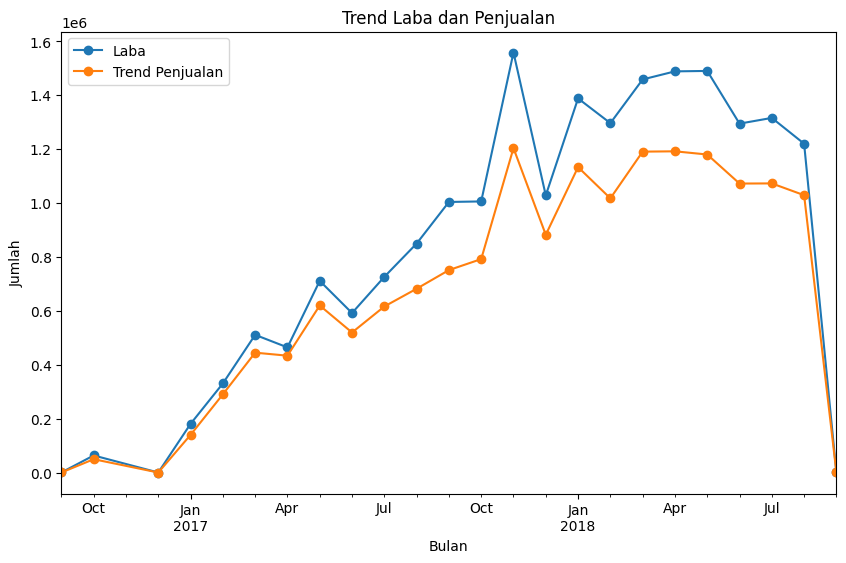

In [72]:
# Membuat line plot
plt.figure(figsize=(10, 6))

# Plot trend laba
trend_total_pendapatan.plot(label='Laba', marker='o')

# Plot trend penjualan
trend_penjualan.plot(label='Trend Penjualan', marker='o')

# Menambahkan label dan judul
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Trend Laba dan Penjualan')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

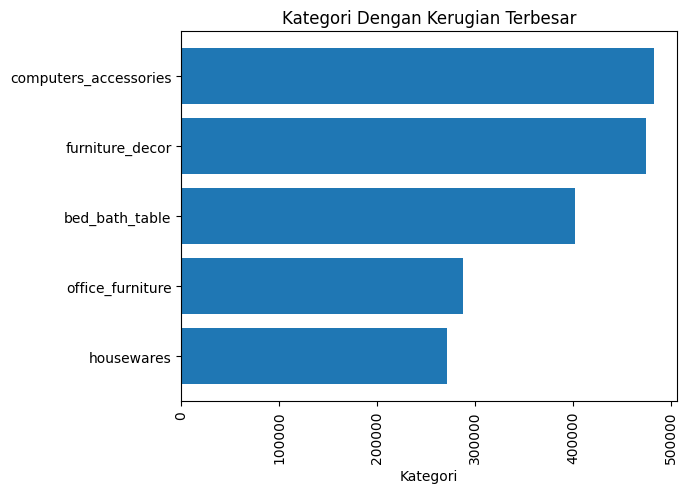

In [73]:
laba_teratas = laba_teratas.sort_values(by='laba', ascending=True)
plt.barh(y=laba_teratas.index,width=laba_teratas['laba'])

plt.title('Kategori Dengan Kerugian Terbesar')
plt.xlabel('Kategori')
plt.xticks(rotation=90)
plt.show()

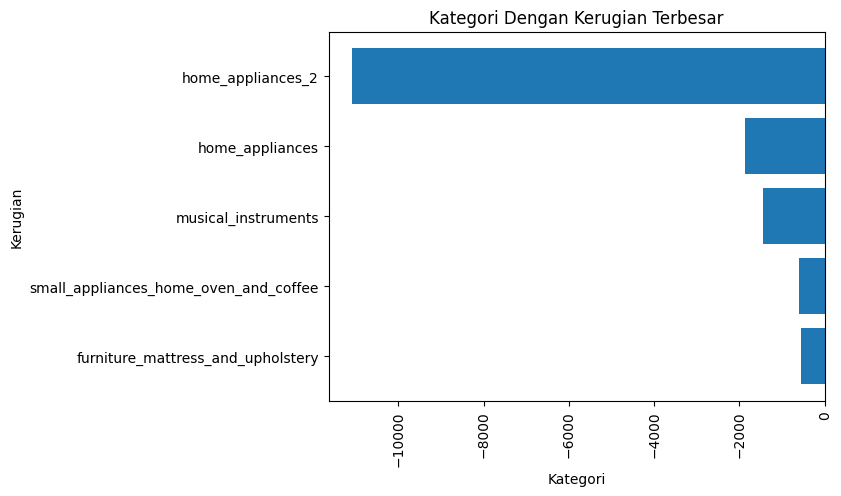

In [74]:
rugi_teratas = rugi_teratas.sort_values(by='laba',ascending=False)
plt.barh(y=rugi_teratas.index,width=rugi_teratas['laba'])

plt.title('Kategori Dengan Kerugian Terbesar')
plt.xlabel('Kategori')
plt.ylabel('Kerugian')
plt.xticks(rotation=90)
plt.show()

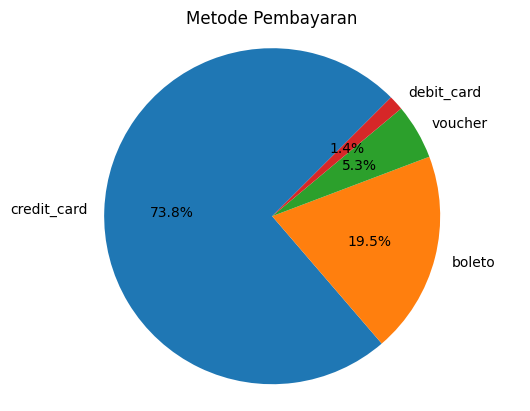

In [75]:
# Perbandingan Metode Pembayaran
plt.pie(x=payment, labels=payment.index,autopct="%1.1f%%",startangle=45)
plt.title('Metode Pembayaran')
plt.axis("equal")
plt.show()

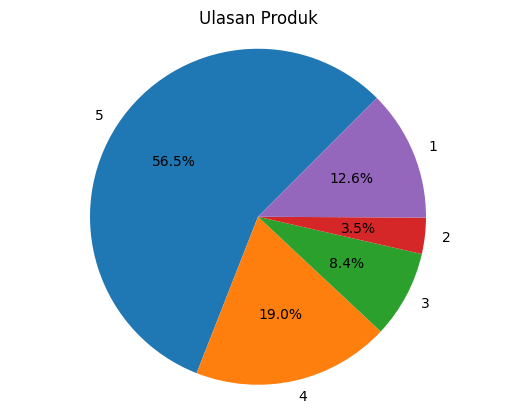

In [76]:
plt.pie(x=rating,labels=rating.index,autopct="%1.1f%%",startangle=45)
plt.title('Ulasan Produk')
plt.axis("equal")
plt.show()

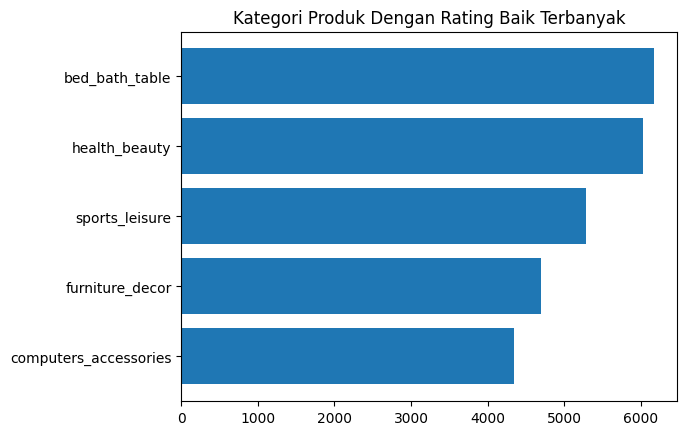

In [77]:
# Kategori Dengan Ulasan Baik Terbanyak
rating_lima = rating_lima.sort_values(ascending=True)
plt.barh(y=rating_lima.index,width=rating_lima.values)
plt.title('Kategori Produk Dengan Rating Baik Terbanyak')
plt.show()

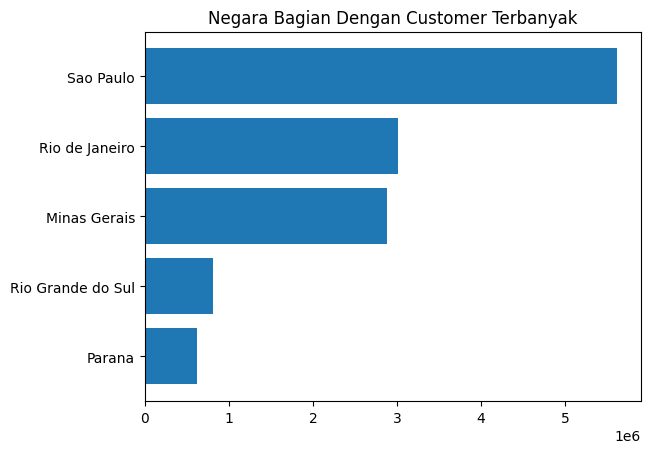

In [78]:
top_state = top_state.sort_values(ascending=True)
plt.barh(y=top_state.index, width=top_state.values)
plt.title('Negara Bagian Dengan Customer Terbanyak')
plt.show()

In [79]:
# Membuat peta dengan lokasi tengah Brasil
brazil_map = folium.Map(location=[-15.7801, -47.9292], zoom_start=4)

# Membuat instance objek MarkerCluster
marker_cluster = plugins.MarkerCluster().add_to(brazil_map)

# Menambahkan marker untuk setiap negara bagian pada peta
for state, count in state_counts.items():
    # Menggunakan pemetaan untuk mendapatkan nama lengkap negara bagian
    state_full_name = state_mapping.get(state, state)

    # Menambahkan teks popup dengan informasi jumlah pelanggan
    popup_text = f"{state_full_name}: {count} customers"

    # Mendapatkan koordinat negara bagian (jika diketahui)
    state_location = customer_info.loc[customer_info['customer_state'] == state, ['geolocation_lat', 'geolocation_lng']]

    # Memeriksa apakah ada data lokasi untuk state tertentu
    if not state_location.empty:
        state_location = state_location.iloc[0]

        # Menambahkan marker ke dalam MarkerCluster
        folium.Marker(
            location=[state_location['geolocation_lat'], state_location['geolocation_lng']],
            icon=None,
            popup=popup_text
        ).add_to(marker_cluster)

# Menampilkan peta
brazil_map